# YOLOv8n Model
#### Generating labels according to the YOLO format<br>
Format:<br>
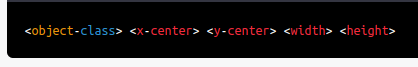


In [1]:
pip install ultralytics opencv-python matplotlib

In [1]:
import os
import cv2
from pathlib import Path

def create_yolo_annotations(image_dir, label_dir, class_name_to_id):
    os.makedirs(label_dir, exist_ok=True)
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_path): continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            if image is None: continue

            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if not contours: continue
            x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))

            h_img, w_img = image.shape[:2]
            x_center = (x + w/2) / w_img
            y_center = (y + h/2) / h_img
            width = w / w_img
            height = h / h_img

            class_id = class_name_to_id[class_name]
            # label_path = os.path.join(label_dir, f"{Path(img_name).stem}.txt")
            subfolder = os.path.basename(class_path)
            subfolder_dir = os.path.join(label_dir, subfolder)
            os.makedirs(subfolder_dir, exist_ok=True)
            label_path = os.path.join(subfolder_dir, f"{Path(img_name).stem}.txt")

            with open(label_path, 'w') as f:
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")


In [ ]:
train_folder = "PlantVillage/train"
val_folder = "PlantVillage/val"

# Get class names
class_names = sorted(os.listdir(train_folder))
class_name_to_id = {name: i for i, name in enumerate(class_names)}


In [3]:
create_yolo_annotations(train_folder, "PlantVillage/train", class_name_to_id)
create_yolo_annotations(val_folder, "PlantVillage/val", class_name_to_id)


In [4]:
with open("plant_data.yaml", "w") as f:
    f.write(f"""path: {os.getcwd()}
train: PlantVillage/train
val: PlantVillage/val
names: {list(class_name_to_id.keys())}
""")